In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Membaca data
df = pd.read_csv('drive/My Drive/Colaboratory/data.csv')
df.head()

# Drop unused ddata
df = df.drop(['Make','Model','Year','Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Driven_Wheels','Number of Doors','Market Category','Vehicle Size','Vehicle Style','Popularity','MSRP'], axis=1)

# Drop duplicate data
df = df.drop_duplicates()

# Drop null value
df = df.dropna() 

# Rename columns
df = df.rename(columns={"highway MPG": "MPGH", "city mpg": "MPGC"})

# Clean outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df.head(5)

,MPGH,MPGC
0,26,19
1,28,19
2,28,20
3,28,18
6,26,17


In [3]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,MPGH,MPGC
0,0.807391,0.590017
1,0.827476,0.561501
2,0.813733,0.581238
3,0.841178,0.540758
4,0.836970,0.547249


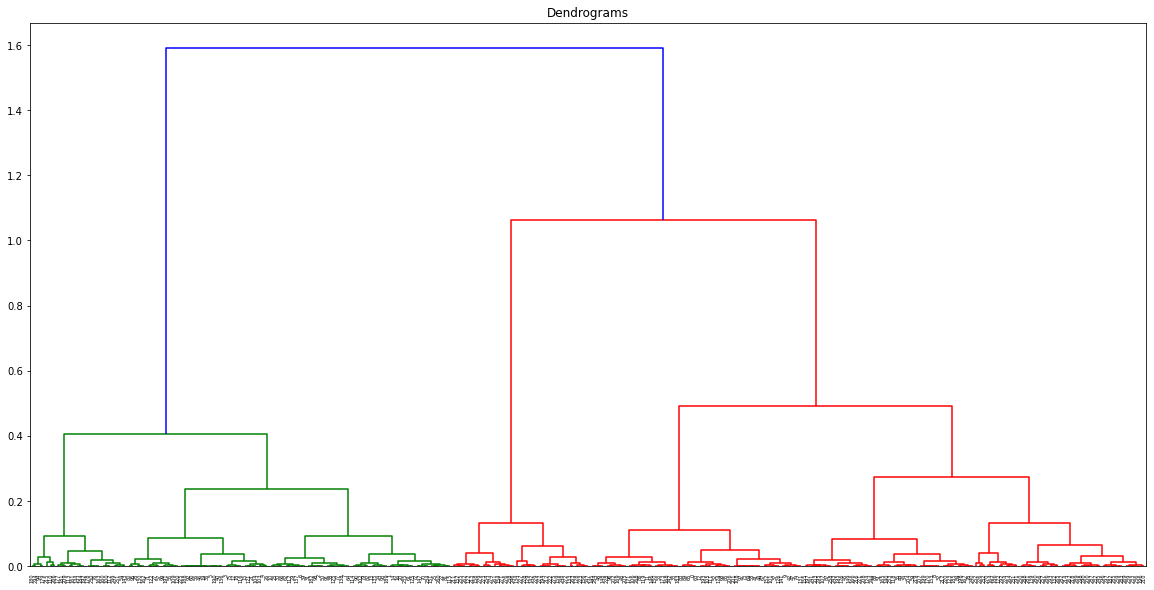

In [4]:
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [5]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

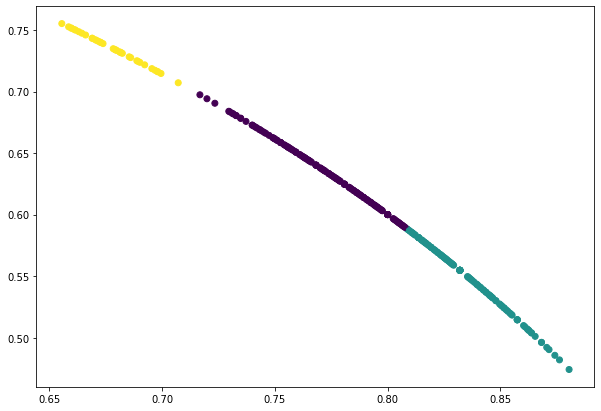

In [6]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['MPGH'], data_scaled['MPGC'], c=cluster.labels_) 